# Regresja logistyczna za pomocą sieci neuronowej

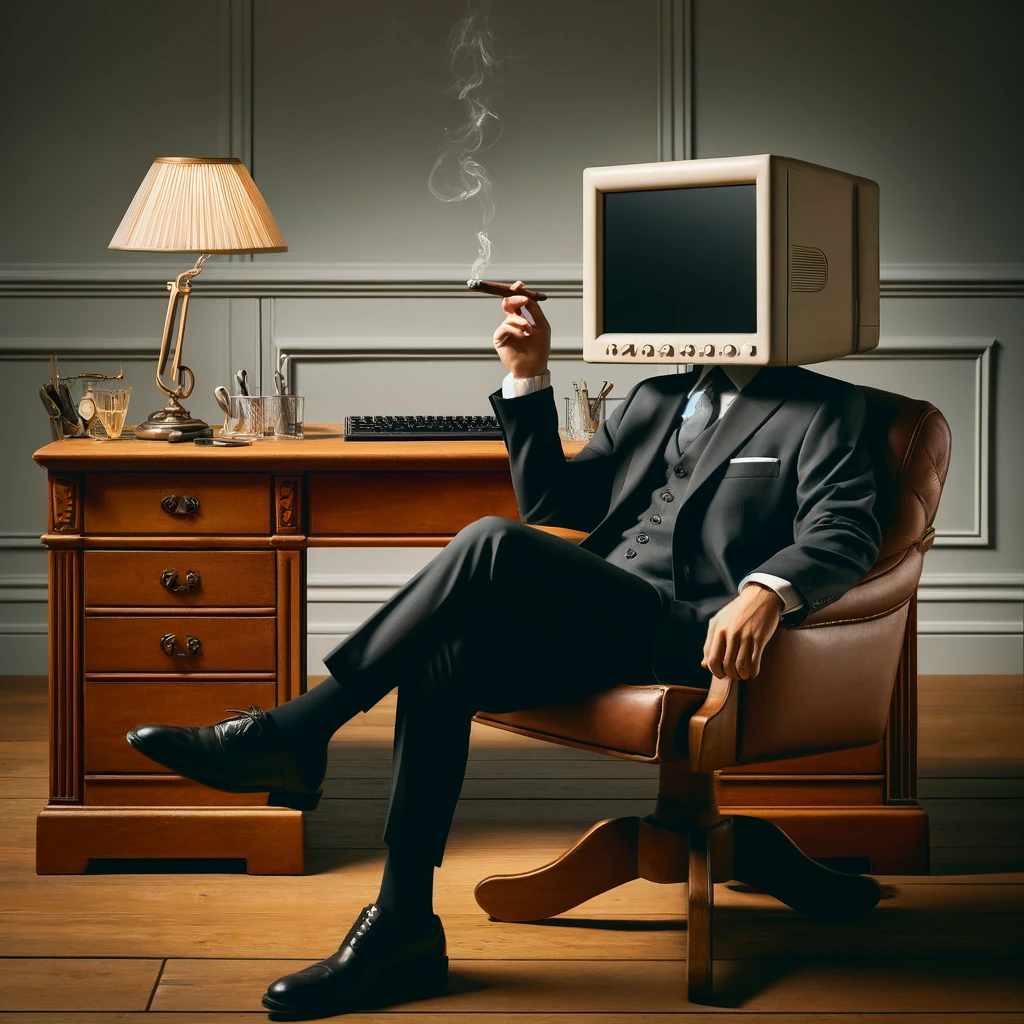

In [7]:
from math import pi
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


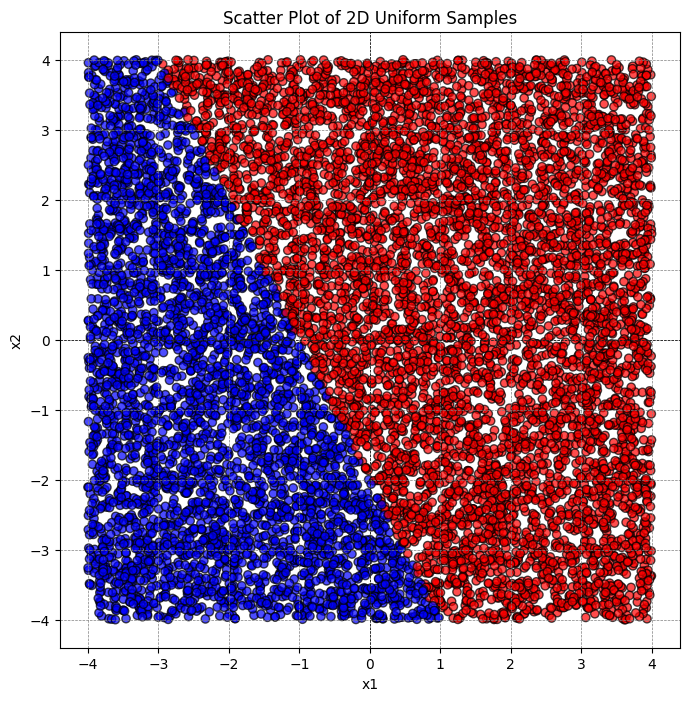

In [20]:
# Generate 1000 samples from 2D Uniform [-5, 5]
samples = np.random.uniform(-4, 4, (10000, 2))

# Calculate y for each point
a = np.array([2, 1])
b = 2
y_values = sigmoid(samples @ a + b)

# Assign colors based on y values
colors = ['red' if y > 0.5 else 'blue' for y in y_values]

# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], c=colors, alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of 2D Uniform Samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black',linewidth=0.5, linestyle='--')
plt.axvline(0, color='black',linewidth=0.5, linestyle='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()


In [32]:
def get_data(n_samples, inner_radius=1.5, ring_inner=1.5, ring_outer=2.5):
  angles = torch.rand(n_samples // 2) * 2 * pi

  # Inner circle
  rs_in = torch.rand(n_samples // 2) * inner_radius
  x1_inner = rs_in * torch.cos(angles)
  x2_inner = rs_in * torch.sin(angles)
  points_inner = torch.cat([x1_inner[:, None], x2_inner[:, None]], dim=1)

  # Outer ring
  rs_out = torch.rand(n_samples // 2) * (ring_outer - ring_inner) + ring_inner
  x1_outer = rs_out * torch.cos(angles)
  x2_outer = rs_out * torch.sin(angles)
  points_outer = torch.cat([x1_outer[:, None], x2_outer[:, None]], dim=1)

  X = torch.cat([points_inner, points_outer])
  y = torch.cat([torch.zeros(n_samples // 2), torch.ones(n_samples // 2)])
  return X, y

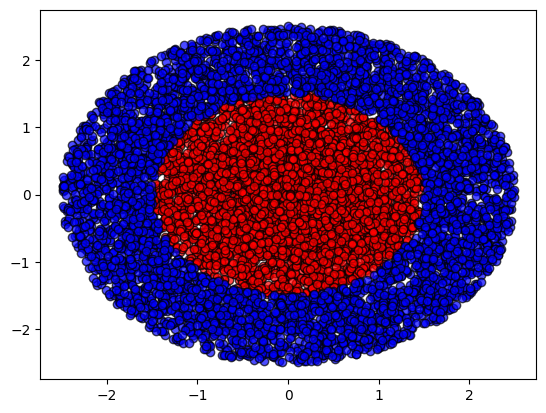

In [85]:
X, y = get_data(10000)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', alpha=0.7, edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', alpha=0.7, edgecolor='k')
plt.show()

# Regresja logistyczna revisited

In [86]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


def cross_entropy_loss(y, probs, eps=0):
  return - (y * torch.log(probs + eps) + (1 - y) * torch.log(1 - probs + eps)).mean()


class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.W = nn.Parameter(torch.rand(2, 1))
    self.b = nn.Parameter(torch.zeros(1))

  def forward(self, X):
    z = X @ self.W + self.b #f
    probs = sigmoid(z)
    return probs

In [87]:
n_epochs = 1000
learning_rate = 1e-1

model = LogisticRegression()
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()

for i in range(n_epochs):
  probs = model(X)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(f'Epoch {i} Cross entropy {loss.item():.4f}')

Epoch 0 Cross entropy 0.8142
Epoch 100 Cross entropy 0.6934
Epoch 200 Cross entropy 0.6931
Epoch 300 Cross entropy 0.6931
Epoch 400 Cross entropy 0.6931
Epoch 500 Cross entropy 0.6931
Epoch 600 Cross entropy 0.6931
Epoch 700 Cross entropy 0.6931
Epoch 800 Cross entropy 0.6931
Epoch 900 Cross entropy 0.6931


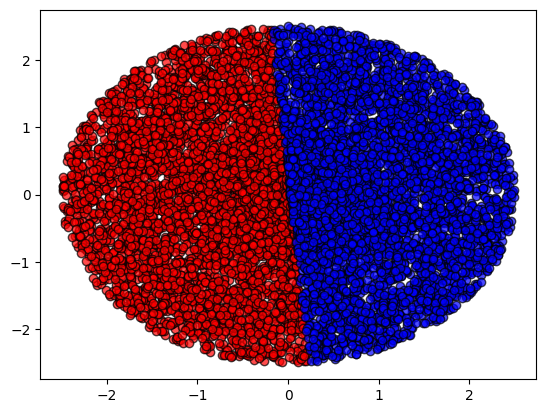

In [88]:
with torch.no_grad():
  probs = model(X).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red', alpha=0.7, edgecolor='k')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', alpha=0.7, edgecolor='k')
plt.show()

# Kwadratowa regresja logistyczna 

In [102]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


def cross_entropy_loss(y, probs, eps=0):
  return - (y * torch.log(probs + eps) + (1 - y) * torch.log(1 - probs + eps)).mean()


class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.W = nn.Parameter(torch.rand(2, 1))
    self.b = nn.Parameter(torch.zeros(1))

  def forward(self, X):
    z = X @ self.W + self.b
    probs = sigmoid(z)
    return probs
  
X2 = X.clone()
X2[:,0] = X2[:,0]**2
X2[:,1] = X2[:,1]**2

n_epochs = 1000
learning_rate = 1e-1

model = LogisticRegression()
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()

for i in range(n_epochs):
  probs = model(X2)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(f'Epoch {i} Cross entropy {loss.item():.4f}')

Epoch 0 Cross entropy 0.5517
Epoch 100 Cross entropy 0.2857
Epoch 200 Cross entropy 0.2154
Epoch 300 Cross entropy 0.1801
Epoch 400 Cross entropy 0.1586
Epoch 500 Cross entropy 0.1439
Epoch 600 Cross entropy 0.1331
Epoch 700 Cross entropy 0.1247
Epoch 800 Cross entropy 0.1180
Epoch 900 Cross entropy 0.1125


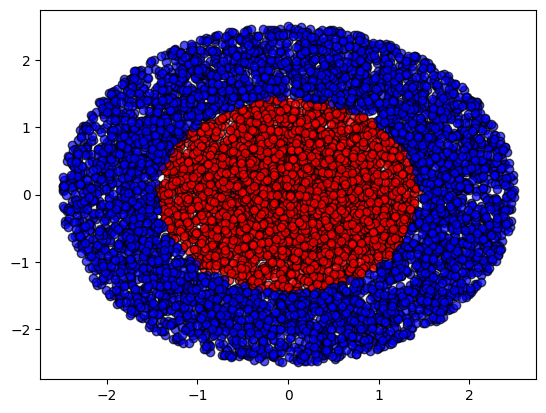

In [103]:
with torch.no_grad():
  probs = model(X2).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red', alpha=0.7, edgecolor='k')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', alpha=0.7, edgecolor='k')
plt.show()

# Sieć neuronowa 😎

In [104]:
class NeuralNet(nn.Module):
  def __init__(self, hidden_size=4):
    super(NeuralNet, self).__init__()
    self.W1 = nn.Parameter(torch.randn(2, hidden_size))
    self.b1 = nn.Parameter(torch.zeros(hidden_size))
    self.W2 = nn.Parameter(torch.randn(hidden_size, 1))
    self.b2 = nn.Parameter(torch.zeros(1))

  def forward(self, X):
    Z1 = X @ self.W1 + self.b1
    #A1 = sigmoid(Z1)
    A1 = torch.relu(Z1)
    Z2 = A1 @ self.W2 + self.b2
    probs = sigmoid(Z2)
    return probs
  


    # def forward(self, X):
    #   z = X @ self.W + self.b
    #   probs = sigmoid(z)
    #   return probs

In [105]:


model = NeuralNet(hidden_size=4)
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()


In [106]:
n_epochs = 400
learning_rate = 1e-1

for i in range(n_epochs):
  probs = model(X)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 500 == 0:
    print(f'\rEpoch {i} Cross entropy {loss.item():.4f}', end="")

Epoch 0 Cross entropy 0.7573

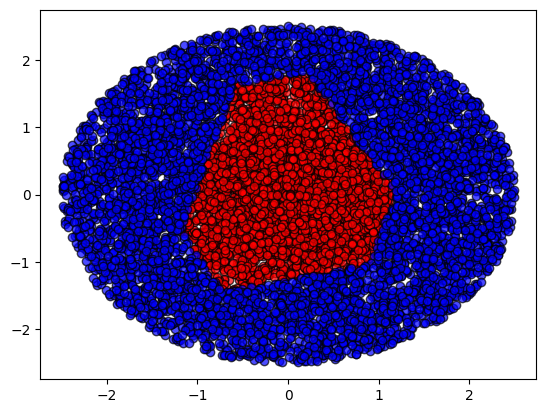

In [107]:
with torch.no_grad():
  probs = model(X).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red', alpha=0.7, edgecolor='k')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', alpha=0.7, edgecolor='k')
plt.show()

# Sieć neuronowa z pełnym wykorzystaniem Pytorcha

In [108]:
class NeuralNetV2(nn.Module):
  def __init__(self, hidden_size=4):
    super(NeuralNetV2, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(2, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, 1),
        nn.Sigmoid()
    )

  def forward(self, X):
    return self.layers(X)

In [109]:
n_epochs = 4000
learning_rate = 1e-1

model = NeuralNetV2(hidden_size=4)
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()

for i in range(n_epochs):
  probs = model(X)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 500 == 0:
    print(f'\rEpoch {i} Cross entropy {loss.item():.4f}', end="")

Epoch 3500 Cross entropy 0.1161

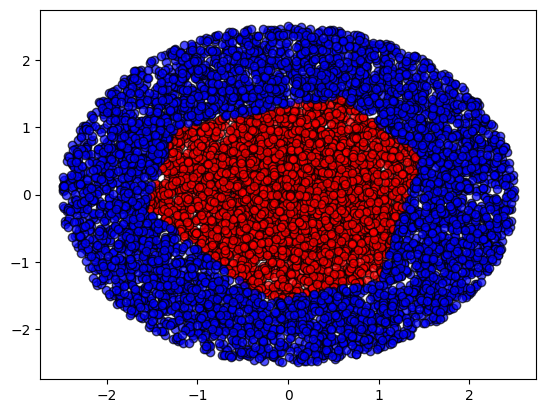

In [110]:
with torch.no_grad():
  probs = model(X).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red', alpha=0.7, edgecolor='k')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', alpha=0.7, edgecolor='k')
plt.show()